In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Настройки для отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)

In [27]:
# Загрузка CSV файла
# Замени 'your_dataset.csv' на путь к твоему файлу
df = pd.read_csv('../data/observations-2.csv')
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")


Размер датасета: 46306 строк, 11 столбцов


In [28]:
df.head()

,id,uuid,observed_on_string,observed_on,url,image_url,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,9984,15255064-05a1-4c23-a0c5-a32435a32e5f,"July 11, 2010 20:23",2010-07-11,http://www.inaturalist.org/observations/9984,https://static.inaturalist.org/photos/21195/me...,Gray Wolf,Canis lupus,Gray Wolf,Mammalia,42048
1,24985,3daa35ed-5c98-4cd1-9a7f-84e3701ebc92,"December 25, 2006 22:49",2006-12-25,http://www.inaturalist.org/observations/24985,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote,Mammalia,42051
2,40826,d3297124-f54f-471d-ae38-05de07b89102,2010-12-29,2010-12-29,http://www.inaturalist.org/observations/40826,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote,Mammalia,42051
3,51264,4ed5f158-d8eb-4e60-abd8-6b8729a13982,2008-08-13,2008-08-13,http://www.inaturalist.org/observations/51264,https://static.inaturalist.org/photos/81250/me...,Gray Wolf,Canis lupus,Gray Wolf,Mammalia,42048
4,52026,06d7a0ee-768c-4892-ac17-63d5f99dd845,2012-02-06,2012-02-06,http://www.inaturalist.org/observations/52026,https://static.inaturalist.org/photos/82247/me...,Coyote,Canis latrans,Coyote,Mammalia,42051


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46306 entries, 0 to 46305
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  46306 non-null  int64 
 1   uuid                46306 non-null  object
 2   observed_on_string  46306 non-null  object
 3   observed_on         46306 non-null  object
 4   url                 46306 non-null  object
 5   image_url           45520 non-null  object
 6   species_guess       46285 non-null  object
 7   scientific_name     46306 non-null  object
 8   common_name         46306 non-null  object
 9   iconic_taxon_name   46306 non-null  object
 10  taxon_id            46306 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 3.9+ MB


In [30]:
df.describe()

,id,taxon_id
count,4.630600e+04,4.630600e+04
mean,1.551964e+08,1.339729e+05
std,9.926619e+07,2.549354e+05
min,9.984000e+03,4.204400e+04
25%,6.679790e+07,4.205100e+04
50%,1.481065e+08,4.205100e+04
75%,2.485419e+08,4.205100e+04
max,3.318190e+08,1.305709e+06


In [31]:
# Проверим уникальные научные названия
print(f"Всего уникальных видов (scientific_name): {df['scientific_name'].nunique()}")
print(f"Всего наблюдений: {len(df)}")

Всего уникальных видов (scientific_name): 49
Всего наблюдений: 46306


In [32]:
# Посмотрим распределение по видам
species_counts = df['scientific_name'].value_counts()
print(species_counts.head(10))

scientific_name
Canis latrans             33085
Canis familiaris           4047
Canis lupus                2914
Canis aureus               1226
Canis familiaris dingo     1220
Canis aureus indicus        490
Canis lupaster              453
Canis lupus italicus        360
Canis aureus naria          283
Canis lupaster bea          237
Name: count, dtype: int64


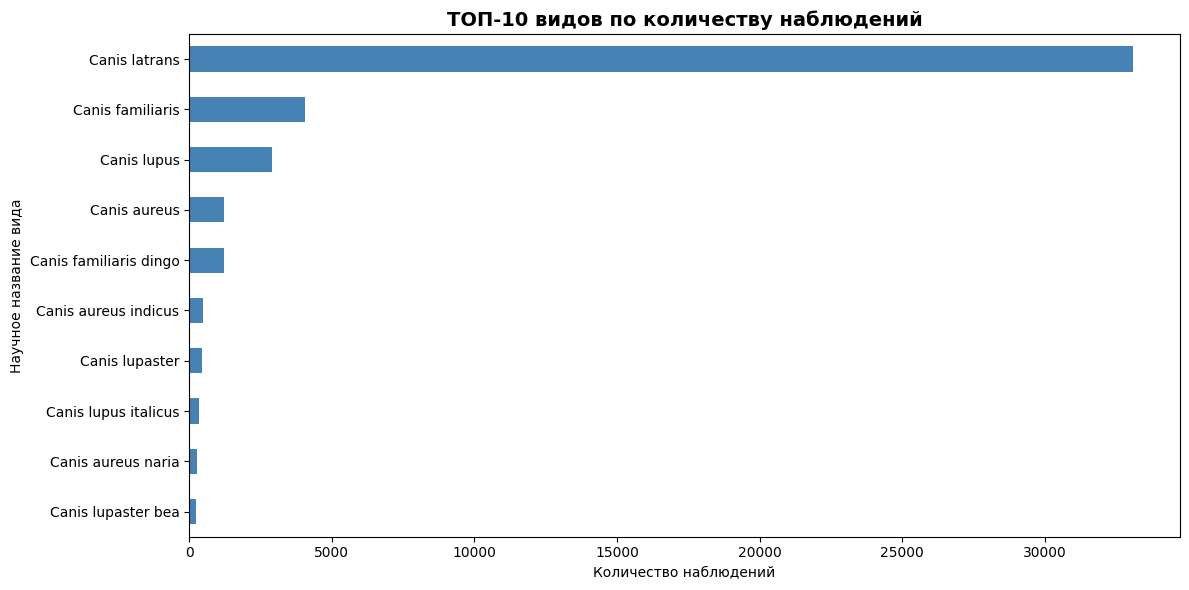

In [33]:
# Визуализация ТОП-10 видов
plt.figure(figsize=(12, 6))
species_counts.head(10).plot(kind='barh', color='steelblue')
plt.xlabel('Количество наблюдений')
plt.ylabel('Научное название вида')
plt.title('ТОП-10 видов по количеству наблюдений', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [34]:
# Посмотрим на соответствие научных и общих названий
print("Примеры видов с их названиями:")
species_info = df[['scientific_name', 'common_name', 'species_guess']].drop_duplicates()
print(species_info.head(10))

Примеры видов с их названиями:
            scientific_name         common_name           species_guess
0               Canis lupus           Gray Wolf               Gray Wolf
1             Canis latrans              Coyote                  Coyote
16     Canis aureus indicus       Indian Jackal           Indian Jackal
21              Canis lupus           Gray Wolf                       狼
25            Canis latrans              Coyote  Coyote (Canis latrans)
33   Canis familiaris dingo               Dingo                   Dingo
42         Canis familiaris        Domestic Dog            Domestic Dog
53    Canis latrans mearnsi       Mearns Coyote                  Coyote
57           Canis simensis      Ethiopian Wolf          Ethiopian Wolf
61  Canis lupaster lupaster  North African Wolf      North African Wolf


In [35]:
# Выбираем топ-5 видов с наибольшим количеством наблюдений
TOP_N = 5
top_species = species_counts.head(TOP_N).index.tolist()

print(f"Выбранные {TOP_N} видов для дальнейшей работы:\n")
for i, species in enumerate(top_species, 1):
    count = species_counts[species]
    common = df[df['scientific_name'] == species]['common_name'].iloc[0]
    print(f"{i}. {species} ({common}): {count} наблюдений")

Выбранные 5 видов для дальнейшей работы:

1. Canis latrans (Coyote): 33085 наблюдений
2. Canis familiaris (Domestic Dog): 4047 наблюдений
3. Canis lupus (Gray Wolf): 2914 наблюдений
4. Canis aureus (Golden Jackal): 1226 наблюдений
5. Canis familiaris dingo (Dingo): 1220 наблюдений


In [36]:
# Фильтруем датасет, оставляя только топ-5 видов
df_filtered = df[df['scientific_name'].isin(top_species)].copy()

print(f"Размер отфильтрованного датасета: {df_filtered.shape[0]}")
print(f"Удалено строк: {df.shape[0] - df_filtered.shape[0]}")

Размер отфильтрованного датасета: 42492
Удалено строк: 3814


In [37]:
print(df_filtered['scientific_name'].value_counts())

scientific_name
Canis latrans             33085
Canis familiaris           4047
Canis lupus                2914
Canis aureus               1226
Canis familiaris dingo     1220
Name: count, dtype: int64


In [38]:
# Оставляем только нужные колонки
columns_to_keep = [
    'uuid',
    'url', 
    'image_url',
    'species_guess',
    'scientific_name',
    'common_name'
]

df_final = df_filtered[columns_to_keep].copy()

print(f"Оставлены следующие столбцы:")
for col in df_final.columns:
    print(f"   - {col}")
    
print(f"Финальный размер датасета: {df_final.shape}")

Оставлены следующие столбцы:
   - uuid
   - url
   - image_url
   - species_guess
   - scientific_name
   - common_name
Финальный размер датасета: (42492, 6)


In [39]:
df_final.head()

,uuid,url,image_url,species_guess,scientific_name,common_name
0,15255064-05a1-4c23-a0c5-a32435a32e5f,http://www.inaturalist.org/observations/9984,https://static.inaturalist.org/photos/21195/me...,Gray Wolf,Canis lupus,Gray Wolf
1,3daa35ed-5c98-4cd1-9a7f-84e3701ebc92,http://www.inaturalist.org/observations/24985,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
2,d3297124-f54f-471d-ae38-05de07b89102,http://www.inaturalist.org/observations/40826,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
3,4ed5f158-d8eb-4e60-abd8-6b8729a13982,http://www.inaturalist.org/observations/51264,https://static.inaturalist.org/photos/81250/me...,Gray Wolf,Canis lupus,Gray Wolf
4,06d7a0ee-768c-4892-ac17-63d5f99dd845,http://www.inaturalist.org/observations/52026,https://static.inaturalist.org/photos/82247/me...,Coyote,Canis latrans,Coyote


In [40]:
# Проверим пропущенные значения в финальном датасете
print("Пропущенные значения:")
missing_data = df_final.isnull().sum()
print(missing_data)
print(f"Всего строк с пропущенными image_url: {df_final['image_url'].isnull().sum()}")

Пропущенные значения:
uuid                 0
url                  0
image_url          768
species_guess       19
scientific_name      0
common_name          0
dtype: int64
Всего строк с пропущенными image_url: 768


In [41]:
df_final_clean = df_final.dropna(subset=['image_url']).copy()

In [42]:
print(f"Строк: {df_final_clean.shape[0]}")
print(f"Столбцов: {df_final_clean.shape[1]}")
print(f"\nВиды и их количество:")
print(df_final_clean['scientific_name'].value_counts())

Строк: 41724
Столбцов: 6

Виды и их количество:
scientific_name
Canis latrans             32404
Canis familiaris           4042
Canis lupus                2876
Canis familiaris dingo     1212
Canis aureus               1190
Name: count, dtype: int64


In [43]:
print("Примеры финальных данных:")
df_final_clean.head(10)

Примеры финальных данных:


,uuid,url,image_url,species_guess,scientific_name,common_name
0,15255064-05a1-4c23-a0c5-a32435a32e5f,http://www.inaturalist.org/observations/9984,https://static.inaturalist.org/photos/21195/me...,Gray Wolf,Canis lupus,Gray Wolf
1,3daa35ed-5c98-4cd1-9a7f-84e3701ebc92,http://www.inaturalist.org/observations/24985,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
2,d3297124-f54f-471d-ae38-05de07b89102,http://www.inaturalist.org/observations/40826,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
3,4ed5f158-d8eb-4e60-abd8-6b8729a13982,http://www.inaturalist.org/observations/51264,https://static.inaturalist.org/photos/81250/me...,Gray Wolf,Canis lupus,Gray Wolf
4,06d7a0ee-768c-4892-ac17-63d5f99dd845,http://www.inaturalist.org/observations/52026,https://static.inaturalist.org/photos/82247/me...,Coyote,Canis latrans,Coyote
5,30ef8dbd-7631-42a5-a228-dddecbdd9a6b,http://www.inaturalist.org/observations/52518,https://static.inaturalist.org/photos/82862/me...,Coyote,Canis latrans,Coyote
6,bc39d1cf-f00a-48ed-a6e0-36623b5e9f30,http://www.inaturalist.org/observations/53309,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
7,9f4371fe-94f7-41a6-8dd3-748f69815083,http://www.inaturalist.org/observations/60492,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
8,1ee63662-560e-475b-95f9-875878998149,http://www.inaturalist.org/observations/61066,https://inaturalist-open-data.s3.amazonaws.com...,Coyote,Canis latrans,Coyote
9,72d89412-23f0-4828-84bf-9a15b6bb8d77,http://www.inaturalist.org/observations/66923,https://static.inaturalist.org/photos/101717/m...,Coyote,Canis latrans,Coyote


In [44]:
SAMPLES_PER_SPECIES = 8000

df_balanced = df_final_clean.groupby('scientific_name', group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), SAMPLES_PER_SPECIES), random_state=42)
).reset_index(drop=True)

print("Распределение после балансировки:")
print(df_balanced['scientific_name'].value_counts())
print(f"Итоговый размер датасета: {df_balanced.shape[0]} строк")


Распределение после балансировки:
scientific_name
Canis latrans             8000
Canis familiaris          4042
Canis lupus               2876
Canis familiaris dingo    1212
Canis aureus              1190
Name: count, dtype: int64
Итоговый размер датасета: 17320 строк


/var/folders/g6/t39ft3s975g9klg54cvh8r8m0000gn/T/ipykernel_96983/2700571572.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_final_clean.groupby('scientific_name', group_keys=False).apply(


In [45]:
# Сохранение сбалансированного датасета
output_filename = '../data/balanced_animals_dataset-2.csv'
df_balanced.to_csv(output_filename, index=False)

print(f"Датасет сохранен в файл: {output_filename}")

Датасет сохранен в файл: ../data/balanced_animals_dataset-2.csv


In [46]:
import os
import requests
from pathlib import Path
from tqdm import tqdm
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

# Создание директорий для каждого вида
base_dir = Path('../animal_images')
base_dir.mkdir(exist_ok=True)

for species in df_balanced['scientific_name'].unique():
    species_dir = base_dir / species.replace(' ', '_')
    species_dir.mkdir(exist_ok=True)

print(f"Созданы директории для {len(df_balanced['scientific_name'].unique())} видов")


Созданы директории для 5 видов


In [47]:
def download_image(url, filepath, timeout=10, retries=9):
    """
    Скачивание изображения по URL с повторными попытками при ошибках
    """
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=timeout, stream=True)
            response.raise_for_status()
            
            with open(filepath, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
            return True
        except Exception as e:
            if attempt == retries - 1:
                return False
            time.sleep(0.5)
    return False

def download_single_image(row_data):
    """
    Обертка для скачивания одного изображения
    """
    species, uuid, image_url, filepath = row_data
    
    if filepath.exists():
        return {'success': True, 'uuid': uuid, 'species': species, 'url': image_url}
    
    success = download_image(image_url, filepath)
    
    return {
        'success': success,
        'uuid': uuid,
        'species': species,
        'url': image_url
    }


In [48]:
# Подготовка данных для параллельного скачивания
download_tasks = []

for idx, row in df_balanced.iterrows():
    species = row['scientific_name'].replace(' ', '_')
    uuid = row['uuid']
    image_url = row['image_url']
    filepath = base_dir / species / f"{uuid}.jpg"
    
    download_tasks.append((species, uuid, image_url, filepath))

print(f"Подготовлено задач для скачивания: {len(download_tasks)}")

Подготовлено задач для скачивания: 17320


In [49]:
# Параллельное скачивание изображений
failed_downloads = []
successful_downloads = 0
max_workers = 200

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    futures = {executor.submit(download_single_image, task): task for task in download_tasks}
    
    with tqdm(total=len(download_tasks), desc="Downloading images") as pbar:
        for future in as_completed(futures):
            result = future.result()
        
            if result['success']:
                successful_downloads += 1
            else:
                failed_downloads.append({
                    'uuid': result['uuid'],
                    'species': result['species'],
                    'url': result['url']
                })
            
            pbar.update(1)

print(f"Успешно скачано: {successful_downloads}")
print(f"Ошибок при скачивании: {len(failed_downloads)}")


Успешно скачано: 17320
Ошибок при скачивании: 0


In [50]:
# Проверка результатов скачивания
for species in df_balanced['scientific_name'].unique():
    species_dir = base_dir / species.replace(' ', '_')
    image_count = len(list(species_dir.glob('*.jpg')))
    expected_count = len(df_balanced[df_balanced['scientific_name'] == species])
    print(f"{species}: {image_count}/{expected_count} изображений")

Canis aureus: 1190/1190 изображений
Canis familiaris: 4042/4042 изображений
Canis familiaris dingo: 1212/1212 изображений
Canis latrans: 8000/8000 изображений
Canis lupus: 2876/2876 изображений
